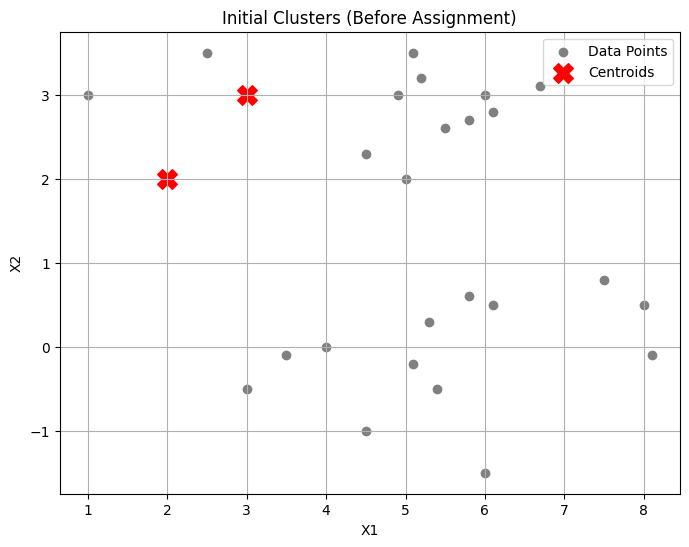

Converged after 3 iterations.


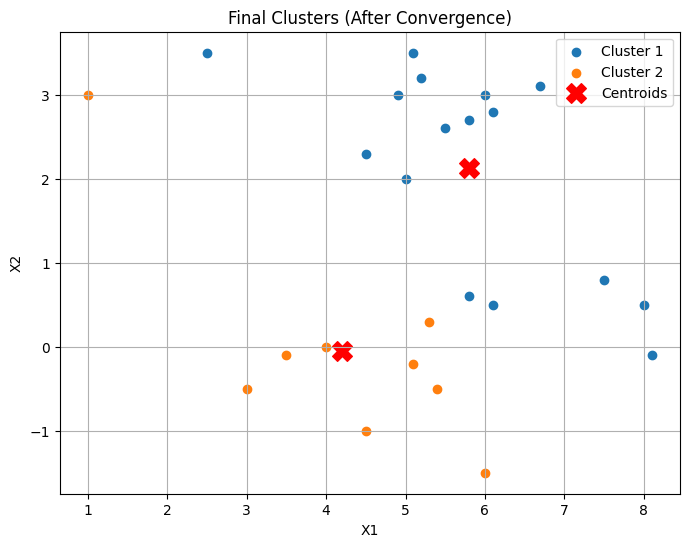

Final Centroids:
[[ 5.8         2.125     ]
 [ 4.2        -0.05555556]]


In [1]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([
    [5.1, 3.5], [4.9, 3.0], [5.8, 2.7], [6.0, 3.0], [6.7, 3.1],
    [4.5, 2.3], [6.1, 2.8], [5.2, 3.2], [5.5, 2.6], [5.0, 2.0],
    [8.0, 0.5], [7.5, 0.8], [8.1, -0.1], [2.5, 3.5], [1.0, 3.0],
    [4.5, -1.0], [3.0, -0.5], [5.1, -0.2], [6.0, -1.5], [3.5, -0.1],
    [4.0, 0.0], [6.1, 0.5], [5.4, -0.5], [5.3, 0.3], [5.8, 0.6]
])

initial_centroids = np.array([[3.0, 3.0], [2.0, 2.0]])

def kmeans_clustering(X, centroids, max_iter=100, threshold=1e-4):
    for iteration in range(max_iter):
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        new_centroids = np.array([X[labels == k].mean(axis=0) if len(X[labels == k]) > 0 else centroids[k] for k in range(len(centroids))])
        
        if np.linalg.norm(new_centroids - centroids) < threshold:
            print(f"Converged after {iteration + 1} iterations.")
            break
        centroids = new_centroids
    return centroids, labels

def plot_clusters(X, centroids, labels=None, title="Clusters"):
    plt.figure(figsize=(8, 6))
    if labels is not None:
        for k in range(len(centroids)):
            cluster_points = X[labels == k]
            plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {k+1}")
    else:
        plt.scatter(X[:, 0], X[:, 1], c='gray', label="Data Points")
    plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='X', s=200, label="Centroids")
    plt.title(title)
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_clusters(X, initial_centroids, title="Initial Clusters (Before Assignment)")
final_centroids, cluster_labels = kmeans_clustering(X, initial_centroids)
plot_clusters(X, final_centroids, labels=cluster_labels, title="Final Clusters (After Convergence)")

print("Final Centroids:")
print(final_centroids)



Converged after 3 iterations.


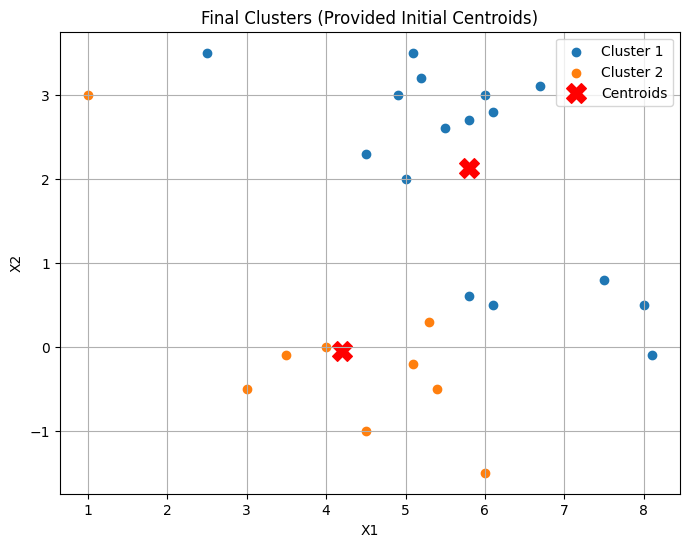

Converged after 3 iterations.


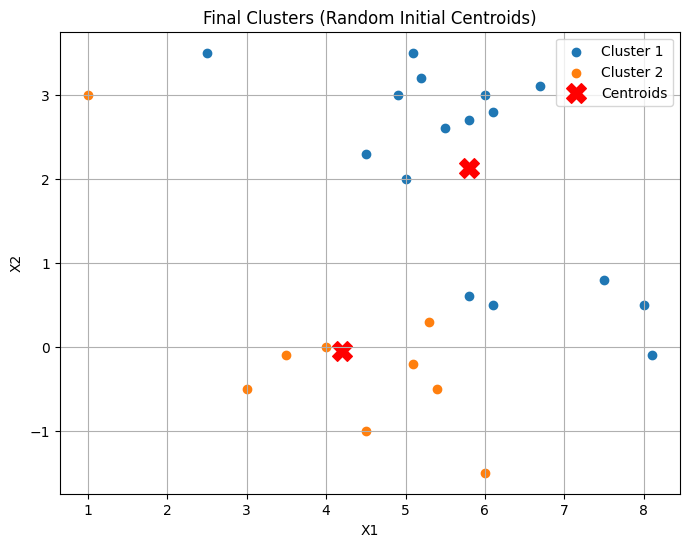

Final Centroids (Provided Initial Centroids):
[[ 5.8         2.125     ]
 [ 4.2        -0.05555556]]

Final Centroids (Random Initial Centroids):
[[ 5.8         2.125     ]
 [ 4.2        -0.05555556]]


In [2]:
provided_initial_centroids = np.array([[3.0, 3.0], [2.0, 2.0]])
final_centroids_provided, cluster_labels_provided = kmeans_clustering(X, provided_initial_centroids)
plot_clusters(X, final_centroids_provided, labels=cluster_labels_provided, title="Final Clusters (Provided Initial Centroids)")


np.random.seed(42)  
random_initial_centroids = X[np.random.choice(X.shape[0], 2, replace=False)]
final_centroids_random, cluster_labels_random = kmeans_clustering(X, random_initial_centroids)
plot_clusters(X, final_centroids_random, labels=cluster_labels_random, title="Final Clusters (Random Initial Centroids)")


print("Final Centroids (Provided Initial Centroids):")
print(final_centroids_provided)

print("\nFinal Centroids (Random Initial Centroids):")
print(final_centroids_random)


Converged after 2 iterations.
Converged after 3 iterations.
Converged after 3 iterations.
Converged after 3 iterations.
Converged after 3 iterations.
Converged after 2 iterations.
Converged after 2 iterations.
Converged after 2 iterations.
Converged after 2 iterations.
Converged after 2 iterations.


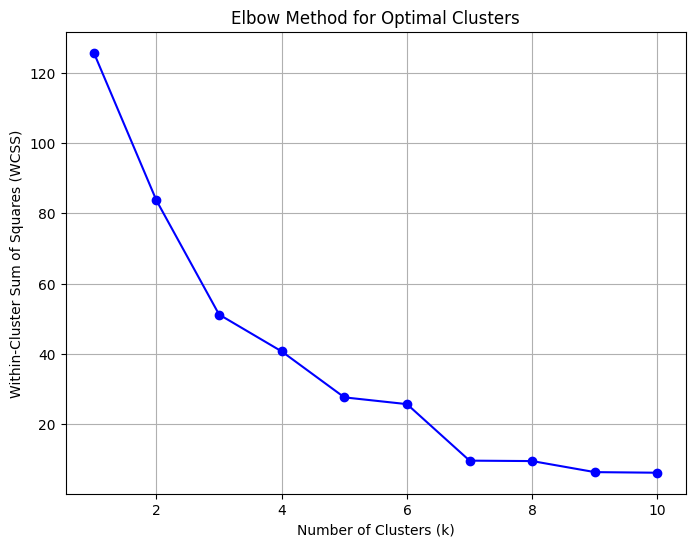

Converged after 3 iterations.


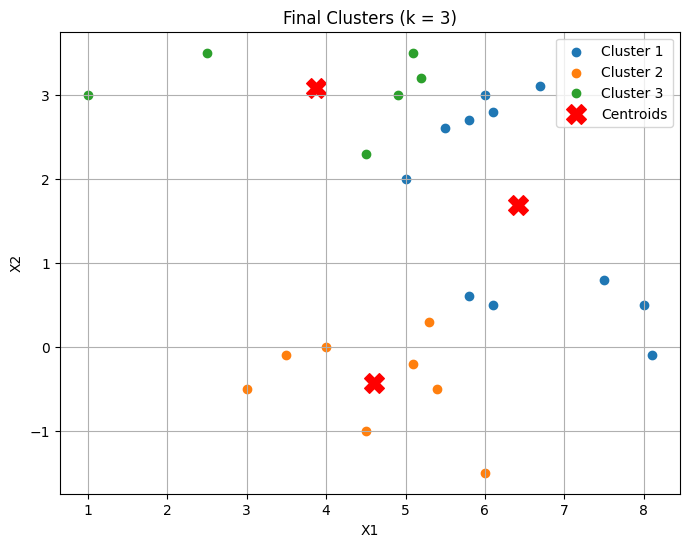

In [3]:
def calculate_wcss(X, centroids, labels):
    return sum(np.sum((X[labels == k] - centroids[k])**2) for k in range(len(centroids)))


def elbow_method(X, max_k=10):
    wcss = []
    for k in range(1, max_k + 1):
        np.random.seed(42)  
        random_initial_centroids = X[np.random.choice(X.shape[0], k, replace=False)]
        centroids, labels = kmeans_clustering(X, random_initial_centroids)
        wcss.append(calculate_wcss(X, centroids, labels))
    return wcss


max_k = 10
wcss = elbow_method(X, max_k)
plt.figure(figsize=(8, 6))
plt.plot(range(1, max_k + 1), wcss, marker='o', linestyle='-', color='b')
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.grid(True)
plt.show()


optimal_k = 3 


np.random.seed(42)
random_initial_centroids = X[np.random.choice(X.shape[0], optimal_k, replace=False)]
final_centroids_optimal, cluster_labels_optimal = kmeans_clustering(X, random_initial_centroids)


plot_clusters(X, final_centroids_optimal, labels=cluster_labels_optimal, title=f"Final Clusters (k = {optimal_k})")
